<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/Programs%20in%20Tensorflow/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:

#Loading the fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_img,train_labels),(test_img,test_labels) = fashion_mnist.load_data()
print(train_img.shape,train_labels.shape,test_img.shape,test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#Reshaping the data
train_img = train_img/255.0
test_img = test_img/255.0
train_img = train_img.reshape(train_img.shape + (1,))
test_img = test_img.reshape(test_img.shape + (1,))
print(train_img.shape,train_labels.shape,test_img.shape,test_labels.shape)




(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax'),
                            
])

In [ ]:
#Optimization and Loss computation
model.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy', metrics = ['acc'] )

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [ ]:
#fitting the model(Training the model)
history = model.fit(train_img, train_labels,batch_size = 4,epochs=5)

Epoch 1/5
15000/15000 [==============================] - 104s 7ms/step - loss: 0.2810 - acc: 0.8948
Epoch 2/5
15000/15000 [==============================] - 103s 7ms/step - loss: 0.2472 - acc: 0.9075
Epoch 3/5
15000/15000 [==============================] - 102s 7ms/step - loss: 0.2230 - acc: 0.9148
Epoch 4/5
15000/15000 [==============================] - 101s 7ms/step - loss: 0.2041 - acc: 0.9234
Epoch 5/5
15000/15000 [==============================] - 101s 7ms/step - loss: 0.1888 - acc: 0.9295


In [ ]:
#evaluation/Prediction
model.evaluate(test_img,test_labels, batch_size= 1)

10000/10000 [==============================] - 17s 2ms/step - loss: 0.3040 - acc: 0.8967


[0.30404236912727356, 0.8967000246047974]

In [ ]:
#libraries
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

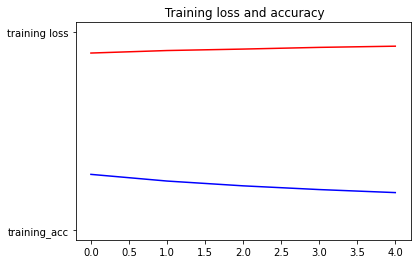

<Figure size 432x288 with 0 Axes>

In [ ]:
#Creating List
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

#Plotting Training loss and accuracy
plt.plot(epochs,acc,'r','training_acc')
plt.plot(epochs,loss,'b','training loss')
plt.title(' Training loss and accuracy')
plt.figure()

